In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

(512, 512, 3)


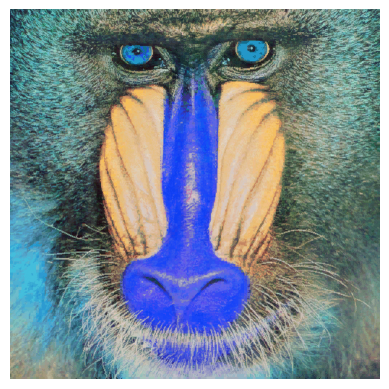

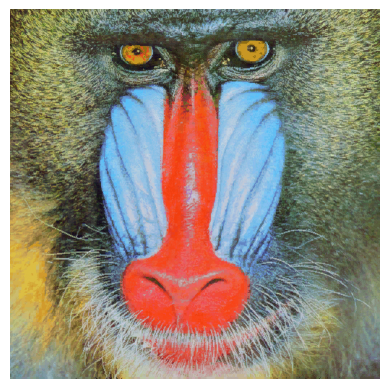

In [2]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 

#Si hay lectura correcta
if img is not None:
    #Muestra dimensiones
    print(img.shape)
    #Mostramos la imagen original con matplotlib
    plt.figure()
    #Eliminamos etiquetas de los ejes
    plt.axis("off")
    plt.imshow(img) 
    plt.show()

    #Recordar que OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Muestra la imagen tras convertir a RGB
    #Eliminamos etiquetas de los ejes
    plt.figure()
    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.show()
else: 
    print('Imagen no encontrada')

(512, 512)


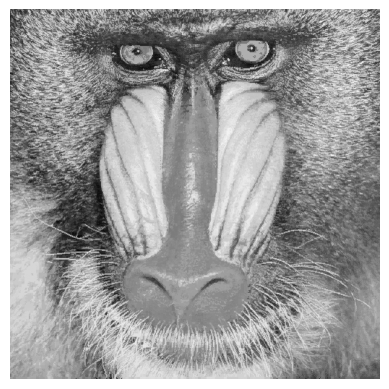

In [3]:
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises con matplotlib
plt.figure()
#Eliminamos etiquetas de los ejes
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()


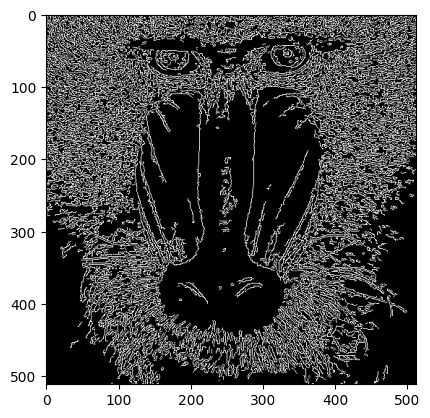

In [4]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
#print(canny) #Muestra contenido, valores 0 o 255
#Visualiza resultado
plt.imshow(canny, cmap='gray') 
plt.show()

[[  0 255   0 ...   0   0   0]
 [  0 255   0 ... 255   0   0]
 [255   0   0 ...   0 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[0.171875   0.19335938 0.1875     0.203125   0.1953125  0.1796875
 0.18554688 0.19921875 0.20703125 0.18554688 0.19335938 0.1640625
 0.19140625 0.20507812 0.15429688 0.18359375 0.19140625 0.18164062
 0.19921875 0.203125   0.1875     0.1953125  0.20117188 0.21484375
 0.23828125 0.1953125  0.22460938 0.23828125 0.19726562 0.19726562
 0.19140625 0.21875    0.24023438 0.22851562 0.19140625 0.24804688
 0.23046875 0.22851562 0.20117188 0.2265625  0.22460938 0.203125
 0.21679688 0.21875    0.22265625 0.1953125  0.23828125 0.24804688
 0.22460938 0.24023438 0.22070312 0.25390625 0.24804688 0.265625
 0.25976562 0.27148438 0.296875   0.26757812 0.28710938 0.30273438
 0.30078125 0.3046875  0.27734375 0.30664062 0.328125   0.26171875
 0.25585938 0.34570312 0.31640625 0.28515625 0.31054688 0.30273438
 0.3164062

(0.0, 512.0)

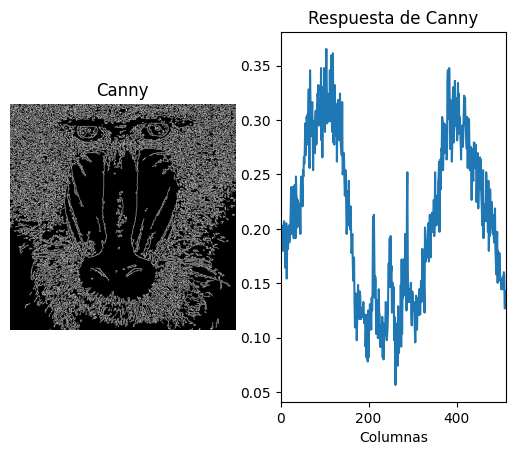

In [5]:
#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])

print(cols)

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el máximo para filas y columnas (uno para cada) y muestra el número de filas con un número de píxeles blancos mayor o igual que 0.95*máximo.


Conteo por filas

(0.0, 512.0)

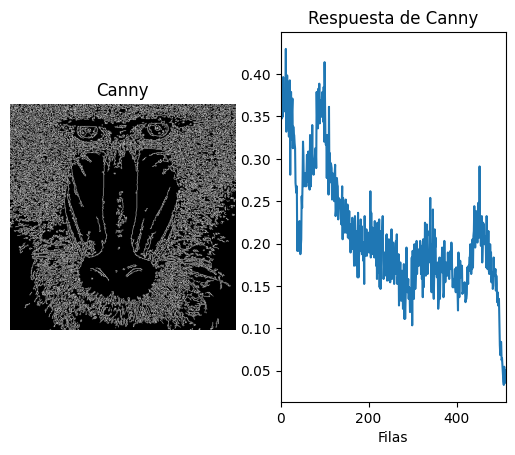

In [6]:
# El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)

# Cuenta el número de píxeles blancos (255) por fila
# Suma los valores de los píxeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)


# Normaliza en base al número de columnas y al valor máximo del píxel (255)
# El resultado será el número de píxeles blancos por fila
rows = row_counts[:, 0] / (255 * canny.shape[0])

# Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
# Rango en x definido por las filas
plt.xlim([0, canny.shape[0]])

Identificación de máximos en columnas y filas

In [7]:
threshold = 0.95

max_col_value = np.max(cols)
print(max_col_value)
cols_over_threshold = []
for i in range(len(cols)):
    if cols[i] >= threshold*max_col_value:
        cols_over_threshold.append(i)
print(cols_over_threshold)
print

max_row_value = np.max(rows)
print(max_row_value)
rows_over_threshold = []
for i in range(len(rows)):
    if rows[i] >= threshold*max_row_value:
        rows_over_threshold.append(i)
print(rows_over_threshold)

0.365234375
[92, 99, 104, 115, 119, 383]
0.4296875
[12, 100]


Sobel

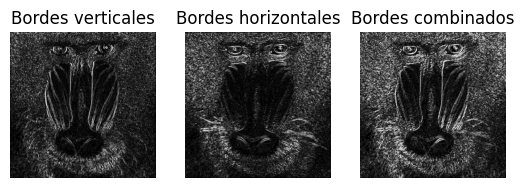

In [8]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Bordes verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Bordes horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Bordes combinados')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
#plt.imshow(sobel, cmap='gray') #Prueba sin convertir escala
plt.show()

Umbralizado

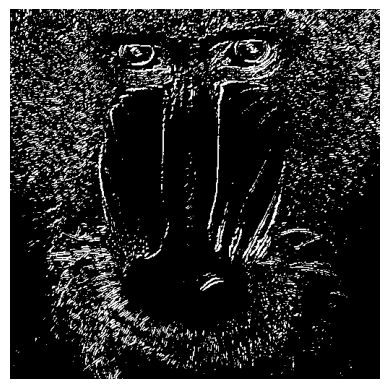

In [9]:

#Define valor umbral
valorUmbral = 130 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(cv2.convertScaleAbs(sobel), valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado

plt.figure()
plt.axis("off")
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()

Conteo por columnas

[0.05078125 0.078125   0.09765625 0.07421875 0.08398438 0.06445312
 0.0703125  0.07226562 0.09375    0.10351562 0.08203125 0.09765625
 0.08203125 0.0703125  0.0703125  0.109375   0.08984375 0.078125
 0.09570312 0.09570312 0.09570312 0.09375    0.125      0.1328125
 0.1171875  0.1171875  0.125      0.1015625  0.109375   0.109375
 0.1171875  0.11523438 0.109375   0.12695312 0.1171875  0.14453125
 0.1328125  0.1015625  0.10742188 0.08984375 0.09375    0.11132812
 0.1015625  0.11328125 0.11132812 0.08203125 0.09960938 0.09179688
 0.09570312 0.07617188 0.09570312 0.15234375 0.140625   0.125
 0.14257812 0.15429688 0.15039062 0.1484375  0.16601562 0.17382812
 0.18359375 0.18164062 0.1796875  0.22460938 0.21679688 0.1953125
 0.16992188 0.21679688 0.20703125 0.18554688 0.19921875 0.22070312
 0.1875     0.16210938 0.17382812 0.21679688 0.20117188 0.18164062
 0.19140625 0.20117188 0.18945312 0.15234375 0.1875     0.21484375
 0.20117188 0.18945312 0.17578125 0.20703125 0.23828125 0.23242188
 0.222

(0.0, 512.0)

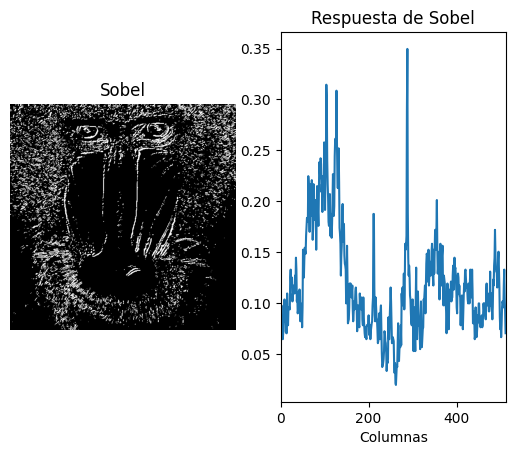

In [10]:
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * imagenUmbralizada.shape[1])

print(cols)

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Sobel")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, imagenUmbralizada.shape[0]])

Conteo por filas

(0.0, 512.0)

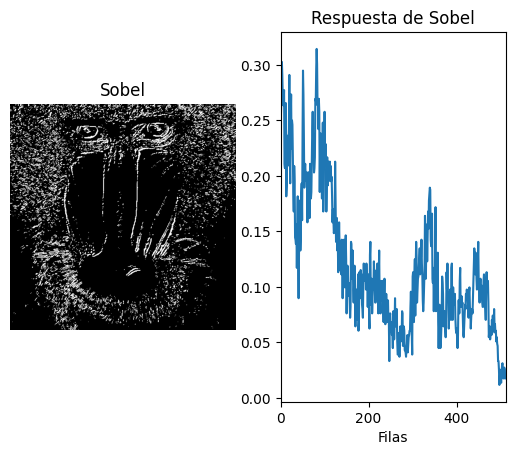

In [11]:
# Cuenta el número de píxeles blancos (255) por fila
# Suma los valores de los píxeles por fila
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)


# Normaliza en base al número de columnas y al valor máximo del píxel (255)
# El resultado será el número de píxeles blancos por fila
rows = row_counts[:, 0] / (255 * imagenUmbralizada.shape[0])

# Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Sobel")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
# Rango en x definido por las filas
plt.xlim([0, imagenUmbralizada.shape[0]])

Identificación de máximos y mínimos

In [12]:
threshold = 0.95

sobel_max_col_value = np.max(cols)
print(sobel_max_col_value)
sobel_cols_over_threshold = []
for i in range(len(cols)):
    if cols[i] >= threshold*sobel_max_col_value:
        sobel_cols_over_threshold.append(i)
print(sobel_cols_over_threshold)
print

sobel_max_row_value = np.max(rows)
print(sobel_max_row_value)
sobel_rows_over_threshold = []
for i in range(len(rows)):
    if rows[i] >= threshold*sobel_max_row_value:
        sobel_rows_over_threshold.append(i)
print(sobel_rows_over_threshold)

0.349609375
[288]
0.314453125
[3, 82, 83]


Comparación Canny vs Sobel

92
99
104
115
119
383


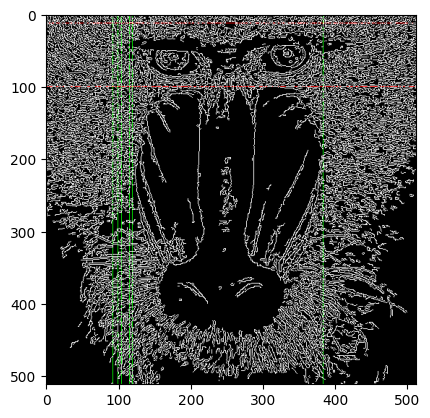

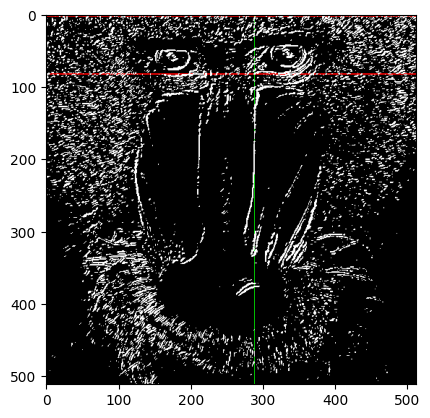

In [14]:
canny_copy = cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB)
for col in cols_over_threshold:
    print(col)
    canny_copy[:, col, 1] = 255
for row in rows_over_threshold:
    canny_copy[row, :, 0] = 255
plt.figure()
plt.imshow(canny_copy)
plt.show()

sobel_copy = imagenUmbralizada.copy()
sobel_copy = cv2.cvtColor(sobel_copy, cv2.COLOR_GRAY2RGB)
sobel_copy[:, sobel_cols_over_threshold[0], 1] = 255
for row in sobel_rows_over_threshold:
    sobel_copy[row, :, 0] = 255
plt.figure()
plt.imshow(sobel_copy)
plt.show()



PROYECTO SUPER GUAPO

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

vid = cv2.VideoCapture(0)

#Marca de inicio
disponible = 0 
#Define valor umbral
lower_limit = (1,50,50)
upper_limit = (18,255,255)


while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    hsvFrame = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsvFrame, lower_limit, upper_limit)
    #print(hsvFrame)
    result = cv2.bitwise_and(frame, frame, mask=mask)

    canny = cv2.Canny(result, 100, 200)

    cv2.imshow("Ovo", canny)
    
    #cv2.imshow("Ovo", cv2.cvtColor(hsvFrame, cv2.COLOR_HSV2RGB))


        
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()